# Admissions 
#### Analyze graduate acceptance using R programming.
Bus471 Data Analytics; Illinois State University; Scott Schmidt
https://github.com/ScottySchmidt

# View Data

In [1]:
install.packages("xlsx")
library("xlsx")
library(data.table)
library(caret)
library(gbm)
library(ggplot2)

file='../input/admissions/admissions.xlsx'
df= read.xlsx(file, 1, header=TRUE)
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


Loaded gbm 2.1.8



,admit,gre,gpa,rank
,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [2]:
summary(df);

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

# Treat Missing Values

In [3]:
df <- na.omit(df)

# Acceptance Analysis

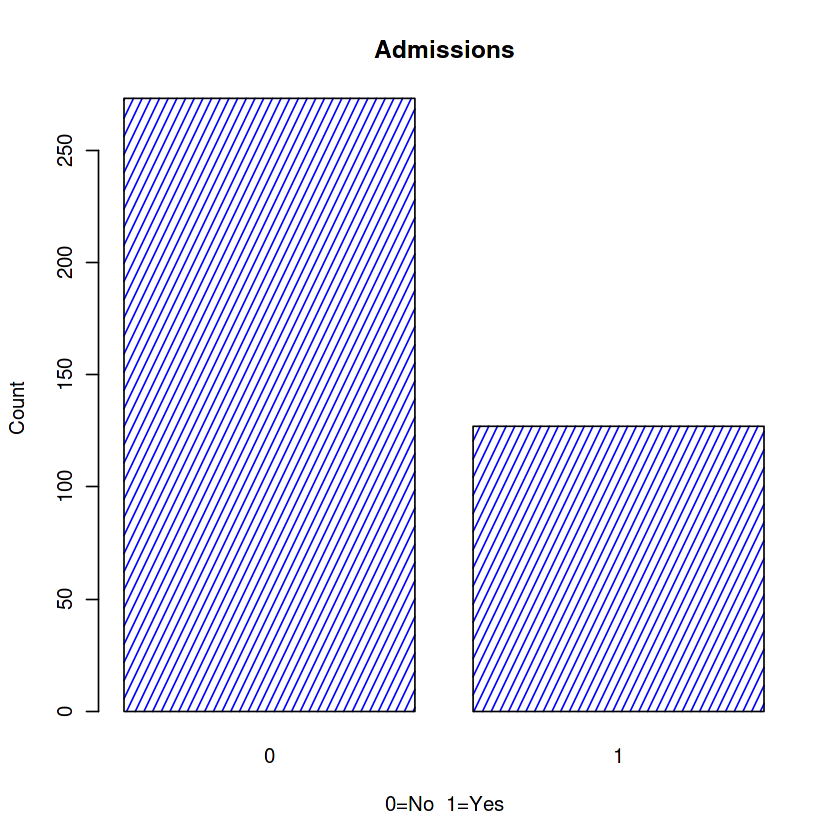

In [4]:
barplot(table(df$admit),
main="Admissions",
xlab="0=No  1=Yes",
ylab="Count",
border="black",
col="blue",
density=10
)

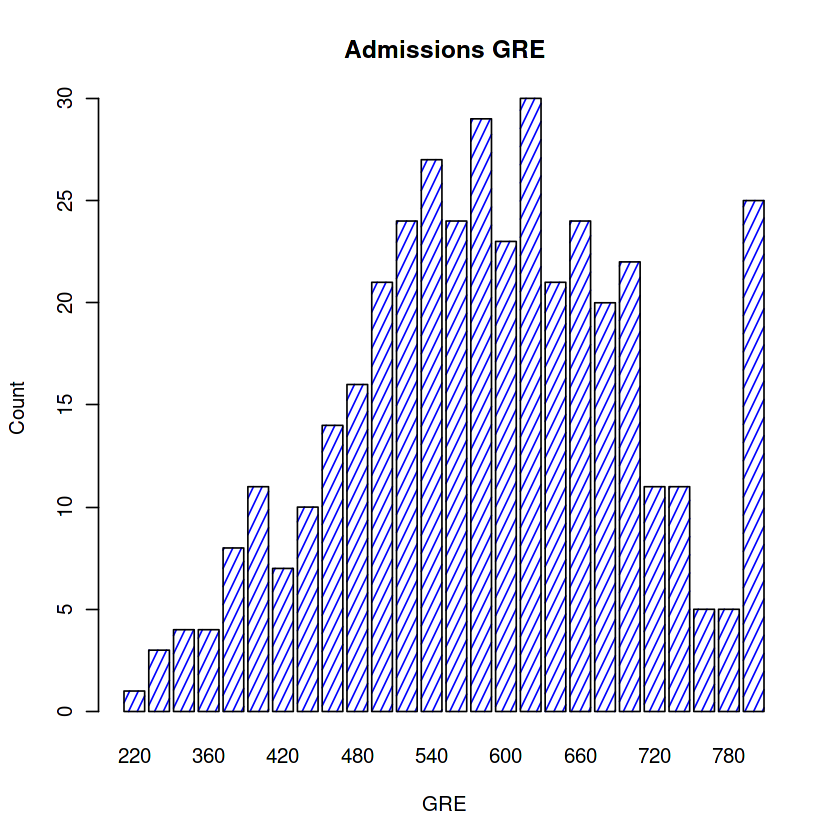

In [5]:
barplot(table(df$gre),
main="Admissions GRE",
xlab="GRE",
ylab="Count",
border="black",
col="blue",
density=10
)

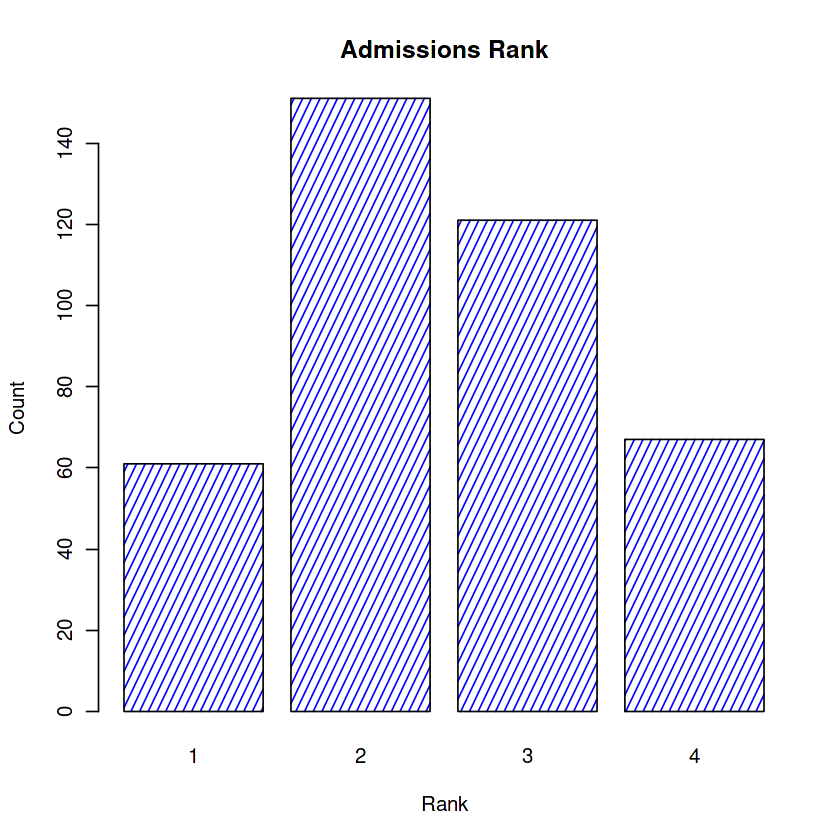

In [6]:
barplot(table(df$rank),
main="Admissions Rank",
xlab="Rank",
ylab="Count",
border="black",
col="blue",
density=10
)

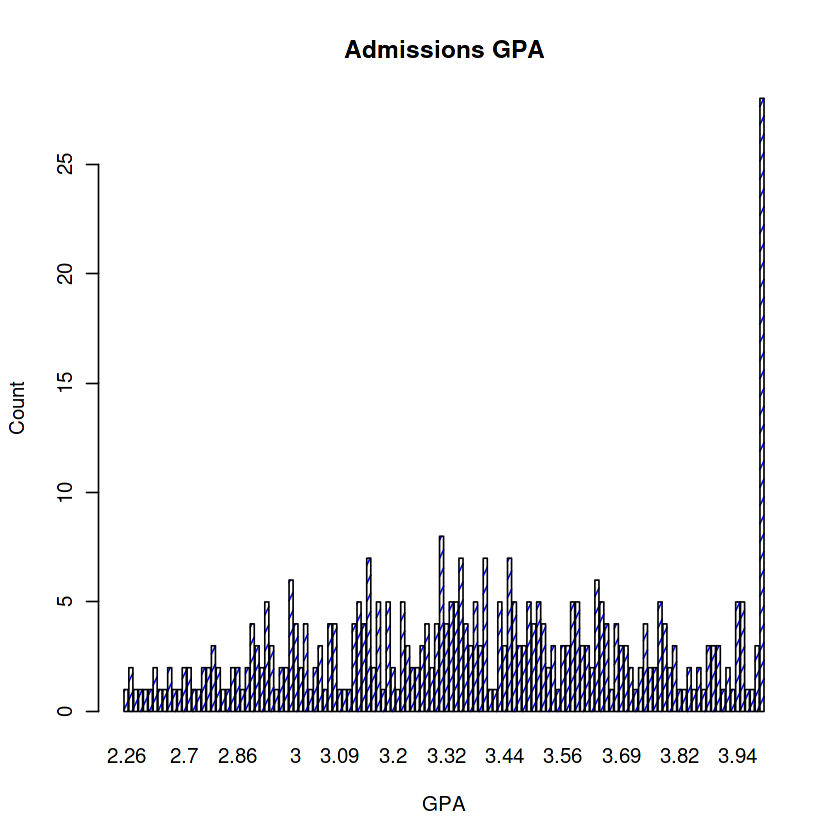

In [7]:
barplot(table(df$gpa),
main="Admissions GPA",
xlab="GPA",
ylab="Count",
border="black",
col="blue",
density=10
)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



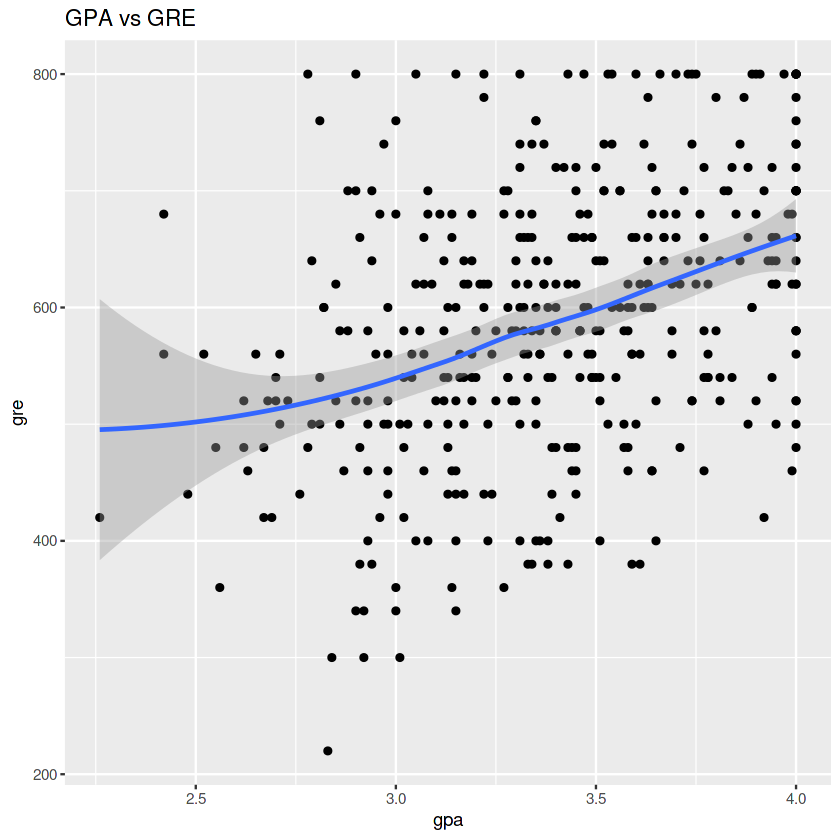

In [8]:
ggplot(df, aes(x=gpa, y=gre), color=cut)+ geom_point() + geom_smooth() + labs(title="GPA vs GRE")

In [9]:
xtabs(~admit + rank, data = df)

     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12

In [10]:
totalGRE<-sum(df$gre)
lenGRE<-length(df$gre)
paste(totalGRE/lenGRE, " is the average GRE score.")

accGRE=sum(df[which(df$admit=='1'), 2])
accGRElen=length(df[which(df$admit=='1'), 2])
accGRE=round(accGRE/accGRElen, digits = 4)
paste(accGRE, " is the average accepted GRE score.")

rejGRE=sum(df[which(df$admit=='0'), 2])
rejGRElen=length(df[which(df$admit=='0'), 2])
rejGRE=round(rejGRE/rejGRElen, digits = 4)
paste(rejGRE, " is the average rejected GRE score.")

[1] "587.7  is the average GRE score."

[1] "618.8976  is the average accepted GRE score."

[1] "573.1868  is the average rejected GRE score."

# Correlations

In [11]:
cor.test(df$admit, df$gre)


	Pearson's product-moment correlation

data:  df$admit and df$gre
t = 3.7437, df = 398, p-value = 0.0002081
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08797348 0.27746823
sample estimates:
      cor 
0.1844343 


In [12]:
cor.test(df$admit, df$gpa)


	Pearson's product-moment correlation

data:  df$admit and df$gpa
t = 3.6132, df = 398, p-value = 0.0003412
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08158617 0.27151944
sample estimates:
      cor 
0.1782123 


In [13]:
cor.test(df$admit, df$rank)


	Pearson's product-moment correlation

data:  df$admit and df$rank
t = -4.987, df = 398, p-value = 9.175e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3326548 -0.1479803
sample estimates:
       cor 
-0.2425132 


In [14]:
cor(df$gpa, df$gre)

[1] 0.3842659

# Split Data

In [15]:
install.packages("caTools")       
library(caTools)

# Splitting data in train and test data
split <- sample.split(df, SplitRatio = 0.7)
split
  
train <- subset(df, split == "TRUE")
test <- subset(df, split == "FALSE")
head(train)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1]  TRUE FALSE FALSE  TRUE

,admit,gre,gpa,rank
,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3
4,1,640,3.19,4
5,0,520,2.93,4
8,0,400,3.08,2
9,1,540,3.39,3
12,0,440,3.22,1


# Logistic Regression

In [16]:
df$rank <- factor(df$rank)
mylogit <- glm(admit ~ gre + gpa + rank, data = df, family = "binomial")
summary(mylogit)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


# Random Forest
Since there is a low amount of datapoints, random forest is a perfect predictive model. Because random forest does not overfit the model, it is often considered the most accurate supervised learning model. 

In [17]:
library(randomForest)

# Fitting Random Forest to the train dataset
set.seed(120)  # Setting seed
classifier_RF = randomForest(x = train[-3],
                             y = train$admit,
                             ntree = 500)
classifier_RF

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Warning message in randomForest.default(x = train[-3], y = train$admit, ntree = 500):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(x = train[-3], y = train$admit, ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.005079173
                    % Var explained: 97.42

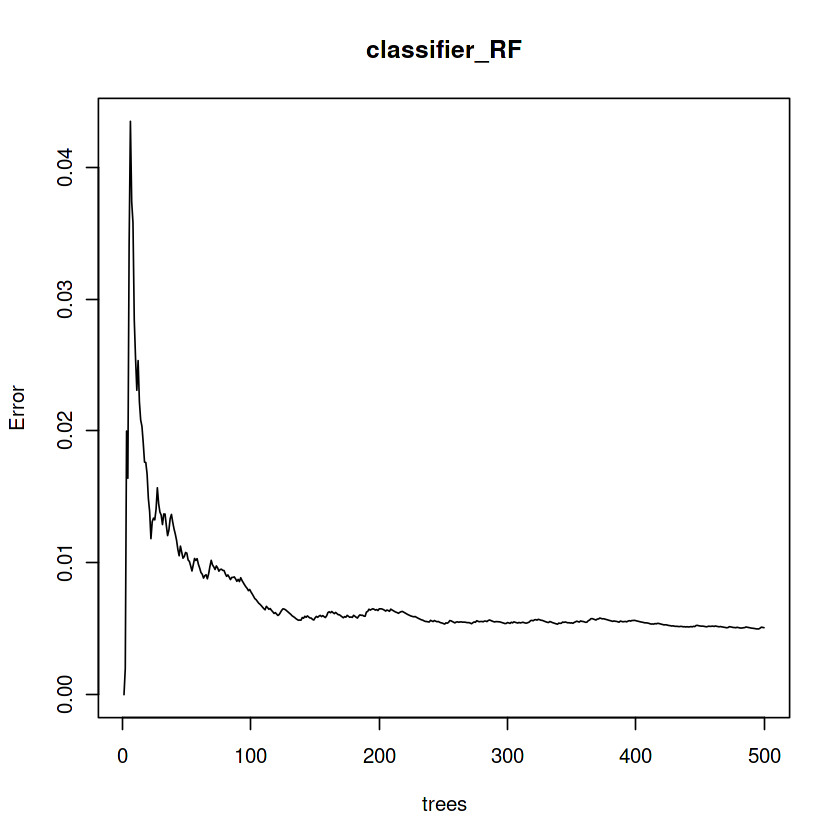

In [18]:
# Predicting the Test results:
y_pred = predict(classifier_RF, newdata = test[-3])
  
# Confusion Matrix
confusion_mtx = table(test[, 3], y_pred)
#confusion_mtx
  
# Plotting model
plot(classifier_RF)

,IncNodePurity
admit,31.598800
gre,1.973807
rank,1.693403


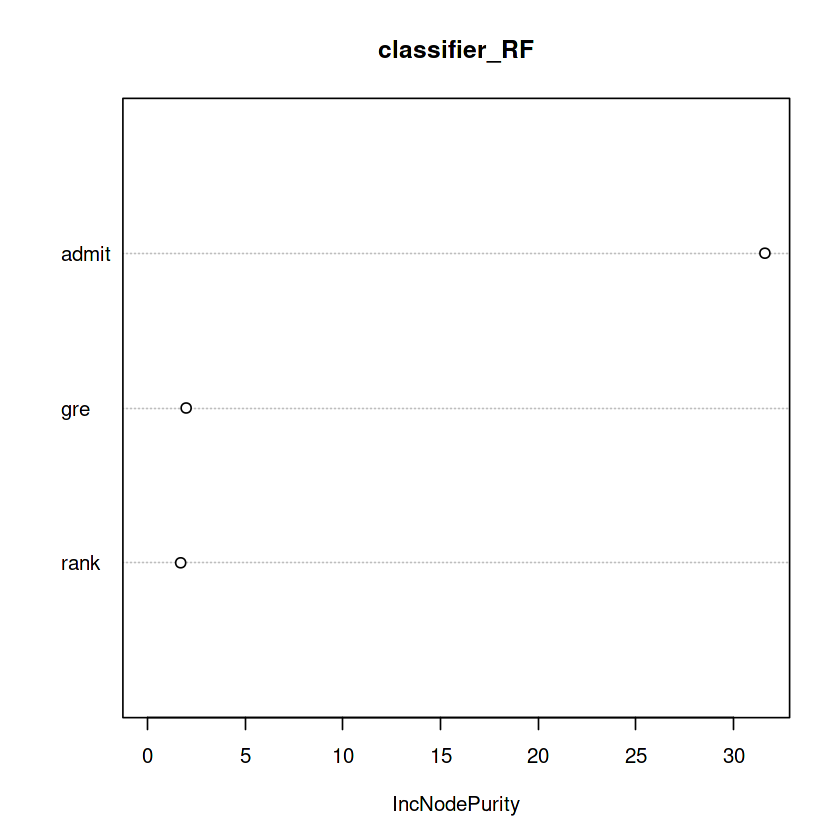

In [19]:
# Importance plot
importance(classifier_RF)

# Variable importance plot
varImpPlot(classifier_RF)

# Test Admissions
I created a testAdmit file for students who are going to apply who have not been accepted or rejected yet.

In [20]:
testDF='../input/testadmit/testAdmit.xlsx'
testDF= read.xlsx(testDF, 1, header=TRUE)
head(testDF)

,gre,gpa,rank
,<dbl>,<dbl>,<dbl>
1,598,3.61,3
2,437,3.67,3
3,332,4.00,1
4,693,3.19,4
5,658,2.93,4
6,408,3.00,2


# New Excel Result

In [21]:
newFile="results.xlsx"
fwrite(df, newFile)
paste("New File Created")
write.xlsx(df, newFile, sheetName = "new")

[1] "New File Created"